# **Music Recommendation System**

## **Milestone 1**

## **Problem Definition**

--------------
## **Context**
--------------

Streaming platforms like Spotify, Soundcloud, and YouTube use different recommendation models to provide personalized suggestions to each user. For example, Spotify uses a machine learning tool called the approximate nearest-neighbour search algorithm to group songs and users together based on shared attributes or qualities.

----------------
## **Objective**
----------------

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

----------------
## **Key Questions**
----------------
- Is there enough data/user interaction to build a recommendation system? 
- How can we explore that data and obtain insights? 
- Which tools can we use to recommend songs to users?
- Which models will give us the best results? 
- How do we measure the results of our models? 

----------------
## **Problem Formulation**
----------------

Given the following dataset of user-song interactions, how do we use our knowledge of recommendation systems to suggest songs to users to maximise user satisfaction and their engagement with the platform, and hence maximise our profits?

-----------------------------
## **Dataset** 
-----------------------------

The core dataset is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**
- song_id: A unique id given to every song
- title: Title of the song
- Release: Name of the released album
- Artist_name: Name of the artist
- year: Year of release

**count_data**
- user _id: A unique id given to the user
- song_id: A unique id given to the song KAUXE93IRB
- play_count: Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RS/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RS/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.tail(10)

,song_id,title,release,artist_name,year
999990,SOFAXZU12AB01881C4,Way Down,Way Down,Taylor Hawkins & The Coattail Riders,2010
999991,SOYFFWW12A6701C135,So Many People,Four,Bah Samba,2002
999992,SOBODSE12A8C13EBD6,Inequality Street,No Daylights_ Nor Heeltaps,SKYCLAD,1996
999993,SOWCNSN12AB018070F,Taurus (Keenhouse Remix),Taurus,Loose Shus,0
999994,SOVRJOO12A8C143C7A,Down Fo' The Kick Doe,Messy Marv Presents: Draped Up and Chipped Out...,Killer Mike feat. Gangsta Pill and Nario of Gr...,0
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0
999999,SOWXJXQ12AB0189F43,Fernweh feat. Sektion Kuchikäschtli,So Oder So,Texta,2004


Note that instead of null entries, the songs for which the year is unknown in the data set, the year is marked 0. Let's change this before we check the dataset for null values. 

In [ ]:
# Replace 0's with np.nan in 'year' column
song_df['year']=song_df['year'].replace(0,np.nan)

### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   song_id      1000000 non-null  object 
 1   title        999985 non-null   object 
 2   release      999995 non-null   object 
 3   artist_name  1000000 non-null  object 
 4   year         515576 non-null   float64
dtypes: float64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**

count_df
- There are 2,000,000 observations and 4 columns in the dataset. One of the columns doesn’t have any information and seems to be there by error so we have taken it out. 
- All columns have 2,000,000 non-null values, i.e., there are no missing values.
- user_id and song_id are of object data type and and unnamed: 0 and play_count are of int64 data type. 

song_df
- There are 1,000,000 observations and 5 columns in the dataset.
- A few columns have null values. The column 'year' has the most null values. song_id and artist_name have no null_values. 
- All columns have object data type except 'year' which has float64 data type. 

We have enough data to support our recommendations.



In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'], axis=1)

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

Label encoding is a method to convert categorical variables to numerical ones. In the current project, as the user_id and song_id are given in the text format, it becomes necessary to convert them to numbers so that we can pass them to the algorithm.


In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder
data=df[['user_id','song_id']].apply(LabelEncoder().fit_transform)
data['play_count']=df['play_count']
data['title']=df['title']
data['release']=df['release'] 
data['artist_name']=df['artist_name']     
data['year']=df['year']
df = data.copy()

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

We want our recommendations to be supported by enough data. 
So we can reduce the dataset by applying certain restrictions, while also making our model computionally less expensive. 

Here, we will be taking users who have have listened to at least 90 songs, and the songs that have been played by at least 120 users. Moreover, the number of songs with play_counts more than 5 is extremely low, which will result in an extremely sparse user-item interaction matrix. This will also increase the size of the matrix, which will make building a recommendation system model computationally expensive. Hence, all such songs are removed from the data.


In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1  

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1   

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final = df_final.loc[df_final['play_count'] <= 5]

In [ ]:
# Check the shape of the data
df_final.shape 

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users and songs in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id

print('Total number of unique user_id = ', df['user_id'].nunique())

Total number of unique user_id =  3156


Total number of unique song id

In [ ]:
# Display total number of unique song_id

print('Total number of unique song_id = ', df['song_id'].nunique())

Total number of unique song_id =  9999


In [ ]:
# Display total number of unique song_id

print('Total number of unique artists = ', df['artist_name'].nunique())

Total number of unique artists =  3374


#### **Observations and Insights:**

There are 3156 users, 9999 songs and 3374 artists in this data set. The total number of user-song interactions is 3156 times 9999 = 31,556,884. We can see that the number of observations is nowhere near the number of possible observations in either case. We can build a recommendation system to recommend songs to users that they have not interacted with and likely increase user interaction by a huge margin.

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# Sort songs according to their total play count
top_songs = df_final.groupby(['song_id'])['play_count'].sum().to_frame().sort_values(by='play_count',ascending=False)

# Define function to get top n songs 
def top_n_songs(n):
  
  # Initiate list 
  toplist = [] 
  # Get the song ids
  top_songs_id=top_songs.index[:n]
  
  # Use ids to add names to the list in the order
  for i in range(n):
    toplist.append(df_final.title[df_final.index[df_final.song_id == top_songs_id[i]][0]])

  return toplist

# Top 5 songs
top_n_songs(5)

['Dog Days Are Over (Radio Edit)',
 'Sehr kosmisch',
 'Use Somebody',
 'Secrets',
 'Fireflies']

Most interacted users

In [ ]:
# Sort users according to their total play count 
top_users = df_final.groupby(['user_id'])['play_count'].sum().to_frame().sort_values(by='play_count',ascending=False)

# Top 5 
top_users.index[:5]

Int64Index([3237, 15733, 62759, 43041, 27401], dtype='int64', name='user_id')

#### **Observations and Insights:**

The most interacted songs are 'Dog Days Are Over (Radio Edit)', 'Sehr kosmisch', 'Use Somebody', 'Secrets', and 'Fireflies'. The most interacted users are 3237, 15733, 62759, 43041, 27401.

Songs played from a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006.0,7592
2007.0,13750
2008.0,14031
2009.0,16351
2010.0,4087


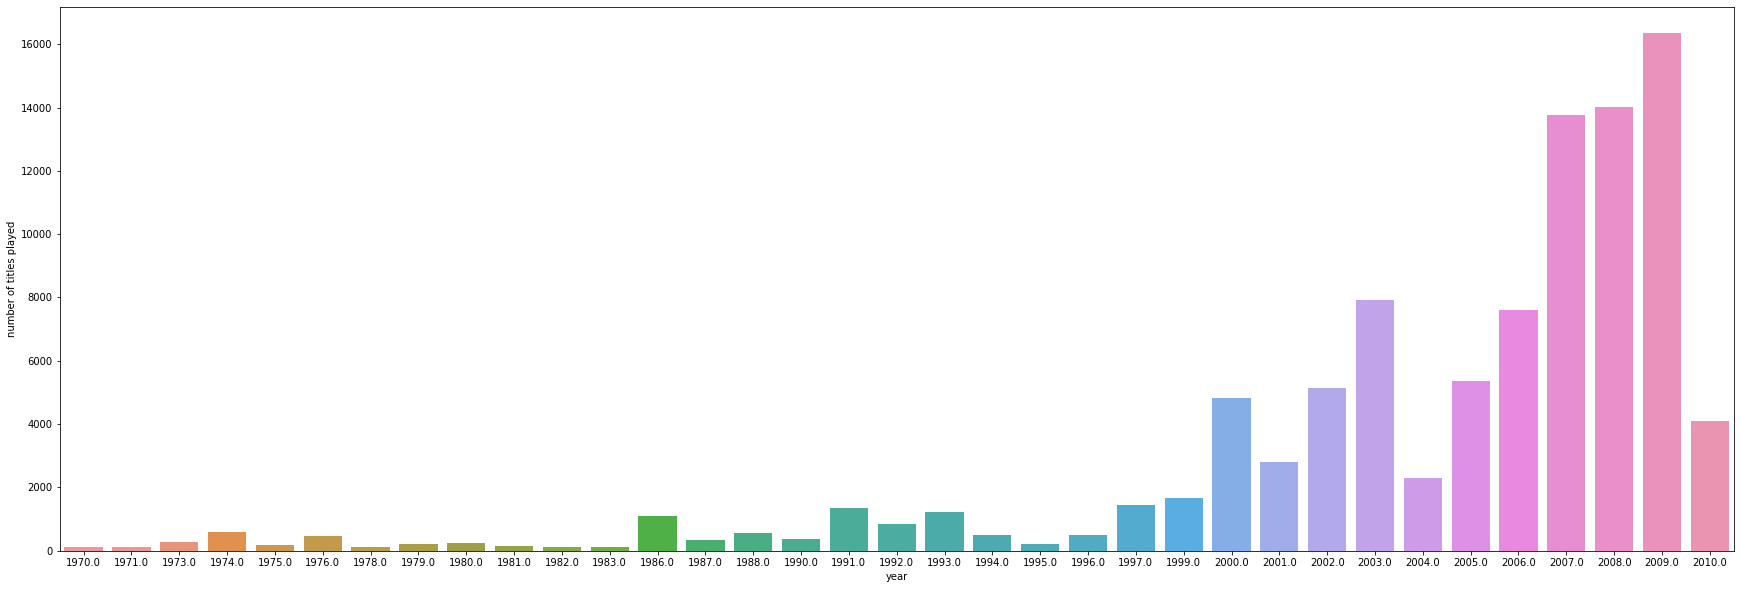

In [ ]:
# Create the plot
# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights:** # 

We notice that songs released in recent years are played more. 

**Think About It:** What other insights can be drawn using exploratory data analysis?

- We can get top releases and artists. 
- We can get the total number of releases per year and in total. 
- We can create a new data frame of users-artists, and users-releases with play count. 

## **Proposed approach**
**1. Potential techniques:** <br>	
1.	Popularity-based recommendation systems
2.	Collaborative Filtering 
•	User-user similarity-based system
•	Item-item similarity-based system
3.	Model-Based Collaborative Filtering - Matrix Factorization
4.	Cluster-Based Recommendation System
5.	Content-Based Recommendation Systems


**2. Overall solution design:** What is the potential solution design?<br>

Build each of the models listed above, optimize parameters when possible, and compare them. 

**Measures of success:** Precision@k, Recall@k, and F1-score@k

Precision@k - It is the fraction of recommended items that are relevant in top k predictions. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.

Recall@k - It is the fraction of relevant items that are recommended to the user in top k predictions.

F1-score@k - It is the harmonic mean of Precision@k and Recall@k. When precision@k and recall@k both seem to be important, it is useful to use this metric because it is representative of both of them.


In [ ]:
from google.colab import  drive
drive.mount('/drive')
df_final.to_csv('/drive/My Drive/Colab Notebooks/df_final.csv')

# **Music Recommendation System**

# **Milestone 2**

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

## **Load the dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the dataset you have saved at the end of milestone 1
df_final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_final.csv')

# Drop the column 'Unnamed: 0'
df_final = df_final.drop(['Unnamed: 0'], axis=1)

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']        # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').count()['play_count']          # Hint: Use groupby function on the song_id column

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs

def top_n_songs(final_play, n, min_interaction):
    
    # Finding songs with minimum number of interactions
    recommendations = final_play[final_play['play_freq'] > min_interaction]
    
    # Sorting values with respect to average rating 
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)
    
    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
top_n_songs(final_play, 10, 0)

Int64Index([7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614], dtype='int64', name='song_id')

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 5.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626434 sha256=9c1912b5e65f6e75ec10dfccf744e1a3103e833873fd0556b2974a28677814ca
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models? 

In the present case, precision and recall both need to be optimized as the service provider would like to minimize both the losses discussed above. Hence, the correct performance measure is the F_1 score, as it is the harmonic mean of the two measures.


In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5? 

- Relevant item: An item (product in this case) that is actually rated higher than the threshold rating (here 1.5) is relevant, if the actual rating is below the threshold then it is a non-relevant item.

- Recommended item: An item that's predicted rating is higher than the threshold (here 1.5) is a recommended item, if the predicted rating is below the threshold then that product will not be recommended to the user.

- Recall: It is the fraction of relevant items that are recommended to the user. 

- Precision: It is the fraction of recommended items that are relevant.  

- The intuition behind using the threshold value of 1.5 is that we want the recommended and relevant sets to be useful while also not being too diluted or restricted. 


In [ ]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale=(0,5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

**Think About It:** How changing the test size would change the results and outputs?

The size of the testing set can affect the F1 score in a few different ways. For example, a larger testing set can provide a more accurate representation of the performance of a model on unseen data, which can lead to a more reliable F1 score. Additionally, a larger testing set can provide a more fine-grained breakdown of the performance of a model on different classes or categories, which can be useful for identifying potential problems or areas for improvement.

However, it's important to note that simply increasing the size of the testing set without careful consideration of the data being used can lead to overfitting and other problems. It's generally best to use a testing set that is large enough to provide reliable results, but not so large that it becomes unwieldy or difficult to work with.

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options=sim_options,verbose=False, random_state=1) # Use random_state = 1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**

- We can observe that the baseline model has RMSE=1.0878 on the test set.
- Intuition of Recall - We are getting a recall of ~0.396, which means out of all the relevant books, 39.6% are recommended.
- Intuition of Precision - We are getting a precision of ~ 0.692, which means out of all the recommended books, 69.2% are relevant.
- Here F_1 score of the baseline model is ~0.504. We can try to improve the performance by using GridSearchCV to tune different hyperparameters of the algorithm.



In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
- The above output shows that the actual play_count for this user-item pair is 2, and the predicted rating is 1.8 by this user-user-similarity-based baseline model.

- The predicted play_count is for the 6958-3232 pair is 1.64


Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.046189515961985
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
 # Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 30
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0928
Precision:  0.394
Recall:  0.676
F_1 score:  0.498


**Observations and Insights:**

- We can observe that the optimized model has RMSE = 1.0928 on the test set.
- Intuition of Recall - We are getting a recall of ~0.394, which means out of all the relevant books, 39.4% are recommended.
- Intuition of Precision - We are getting a precision of ~ 0.676, which means out of all the recommended books, 67.6% are relevant.
- Here F_1 score of the baseline model is ~0.498. 
- These performance metrics are worse than those of the baseline model. To make the optimized model better, one would need to test a wider and/or different range of hyperparameters in gridsearch. 

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.93   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9333333333333333, details={'actual_k': 30, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.57   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5653541521553354, details={'actual_k': 30, 'was_impossible': False})

**Observations and Insights:**

- The above output shows that the actual play_count for this user-item pair 6958-1671 is 2, and the predicted rating is 1.9 by this user-user-similarity-based baseline model.

- The predicted play_count is for the 6958-3232 pair is 1.48

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

We can also find out similar users to a given user or its nearest neighbors based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the msd distance metric.

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[3, 6, 11, 16, 28]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the business ids which user_id has not interacted yet
    for song_id in non_interacted_products:
        
        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, song_id).est
        
        # Appending the predicted ratings
        recommendations.append((song_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.051318
1,614,2.600000
2,5653,2.514023
3,8324,2.471793
4,952,2.400000


**Observations and Insights:**

The top five song recommendations for user 6958 according to this optimized model are 7224, 614, 5653, 8324, and 952. 

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)
  
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

Higher play freq means more accurate predictions. This has been proven empirically.  

In the above-corrected rating formula, we can add the quantity 1/np.sqrt(n) instead of subtracting it to get more optimistic predictions. But here by subtracting this quantity, we are being more stringent by demanding our predicted ratings to be supported by more data. 

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,7224,107,3.051318,2.954645
1,614,373,2.600000,2.548222
2,5653,108,2.514023,2.417798
4,8324,96,2.471793,2.369731
0,952,482,2.400000,2.354451


**Observations and Insights:**

After the correction, the top 5 song recommendations are still the same for user 6958 i.e 7224, 614, 5653, 8324, and 952. 

### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

- We can observe that the baseline model has RMSE = 1.0394 on the test set.
- Intuition of Recall - We are getting a recall of ~0.307, which means out of all the relevant books, 30.7% are recommended.
- Intuition of Precision - We are getting a precision of ~ 0.562, which means out of all the recommended books, 56.2% are relevant.
- Here F_1 score of the baseline model is ~0.397.

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
#df_final.user_id.unique()
#df_final[df_final.song_id == 1671].user_id.unique()

# 27018 has not listened to the song 1671
sim_item_item.predict(27018, 1671,  verbose = True)

user: 27018      item: 1671       r_ui = None   est = 2.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=2.5507234733908, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
- The above output shows that the actual play_count for this user-item pair 6958-1671 is 2, and the predicted play_count is 1.36 by this user-user-similarity-based baseline model.

- The predicted play count for the 27018-1671 pair is 2.55

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0231293426817019
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

- k (int) – The (max) number of neighbors to take into account for aggregation (see this note). Default is 40.
- min_k (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- sim_options (dict) – A dictionary of options for the similarity measure. See Similarity measure configuration for accepted options.
- verbose (bool) – Whether to print trace messages of bias estimation, similarity, etc. Default is True. 

With grid search, we could train the model using different combinations from a wider range of these hyperparameters, and select the combination that produces the best performance on the validation set.

In [ ]:
# Apply the best model found in the grid search
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 30
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0931
Precision:  0.394
Recall:  0.675
F_1 score:  0.498


**Observations and Insights:**
- We can observe that the optimized model has RMSE = 1.0931 on the test set.
- Intuition of Recall - We are getting a recall of ~0.394, which means out of all the relevant books, 39.4% are recommended.
- Intuition of Precision - We are getting a precision of ~ 0.675, which means out of all the recommended books, 67.5% are relevant.
- Here F_1 score of the baseline model is ~0.498.
- These performance metrics are better than those of the baseline model.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.93   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9333333333333333, details={'actual_k': 30, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.57   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5653541521553354, details={'actual_k': 30, 'was_impossible': False})

**Observations and Insights:**

- The above output shows that the actual play_count for this user-item pair 6958-1671 is 2, and the predicted play_count is 1.93 by this user-user-similarity-based baseline model.

- The predicted play count for the 6958-3232 pair is 1.57

In [ ]:
# Find five most similar items to the item with inner id 0
# Use inner id 0
sim_item_item_optimized.get_neighbors(0, 5)

[3, 6, 11, 16, 28]

In [ ]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.051318
1,614,2.600000
2,5653,2.514023
3,8324,2.471793
4,952,2.400000


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,7224,107,3.051318,2.954645
1,614,373,2.600000,2.548222
2,5653,108,2.514023,2.417798
4,8324,96,2.471793,2.369731
0,952,482,2.400000,2.354451


**Observations and Insights:**

The top 5 song recommendations are still the same for user 6958 i.e 7224, 614, 5653, 8324, and 952. 

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)

df_final.user_id.unique()
df_final[df_final.user_id  == 55837].song_id.unique()


# 55837 has not listened to the song 3232
svd.predict(55837, 3232, verbose = True)

user: 55837      item: 3232       r_ui = None   est = 1.79   {'was_impossible': False}


Prediction(uid=55837, iid=3232, r_ui=None, est=1.7940692608476219, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.012681487818665
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

- n_epochs – The number of iteration of the schoasti gradient descent procedure. Default is 20.
- lr_all – The learning rate for all parameters. Default is 0.005.
- reg_all – The regularization term for all parameters. Default is 0.02.

With grid search, we could train the model using different combinations from a wider range of these hyperparameters, and select the combination that produces the best performance on the validation set.

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the train set
svd_optimized=svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

The optimized svd model has better performance metrics. Specifically 

- We can observe that the optimized model has RMSE=1.0141 on the test set.
- Intuition of Recall - We are getting a recall of ~0.415, which means out of all the relevant books, 41.5% are recommended.
- Intuition of Precision - We are getting a precision of ~ 0.635, which means out of all the recommended books, 63.5% are relevant.
- Here F_1 score of the baseline model is ~0.502. 


In [ ]:
# Using svd_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

In [ ]:
# Using svd_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

**Observations and Insights:**

- The above output shows that the actual play_count for this user-item pair 6958-1671 is 2, and the predicted play_count is 1.34 by this user-user-similarity-based baseline model.
- The predicted play count for the 6958-3232 pair with unknown baseline rating is 1.44

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.601899
1,5653,2.108728
2,8324,2.014091
3,6450,1.952493
4,9942,1.940115


**Observations and Insights:**

The top 5 song recommendationsfor user 6958 are 7224, 5653, 8324, 6450, 9942. 

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
clust = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-Fold gridsearch cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gives the best RMSE score
print(gs.best_params['rmse'])

1.0614835538469043
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

- n_cltr_u (int) – Number of user clusters. Default is 3.

- n_cltr_i (int) – Number of item clusters. Default is 3.

- n_epochs (int) – Number of iteration of the optimization loop. Default is 20.

With grid search, we could train the model using different combinations from a wider range of these hyperparameters, and select the combination that produces the best performance on the validation set.

In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 20, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 30
precision_recall_at_k(clust_tuned)

RMSE: 1.0696
Precision:  0.393
Recall:  0.559
F_1 score:  0.462


**Observations and Insights:**

The baseline model has better performance metrics. Specifically 

- We can observe that the baseline model has RMSE=1.0487 on the test set.
- Intuition of Recall - We are getting a recall of 0.397, which means out of all the relevant books, 39.7% are recommended.
- Intuition of Precision - We are getting a precision of 0.582, which means out of all the recommended books, 58.2% are relevant.
- Here F_1 score of the baseline model is ~0.472.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.19   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.187138103563827, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.98   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.983911230116967, details={'was_impossible': False})

#### Implementing the recommendation algorithm based on optimized CoClustering model
- The above output shows that the actual play_count for this user-item pair 6958-1671 is 2, and the predicted play_count is 1.19 by this user-user-similarity-based baseline model.

- The predicted play count for the 6958-3232 pair is 1.98

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)
pd.DataFrame(clustering_recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.762167
1,614,2.622985
2,8831,2.479993
3,8092,2.383471
4,3466,2.307579


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.762167,2.665493
1,614,373,2.622985,2.571207
3,8831,107,2.479993,2.383319
0,8092,550,2.383471,2.340831
4,3466,107,2.307579,2.210905


**Observations and Insights:**

The top 5 song recommendations for 6958 are 7224, 614, 8831, 8092, 3466.  

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

Yes, we can do this computing similarities between the texts of the other features. 

In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title']+df_small['release']+df_small['artist_name']

df_small.tail()

,user_id,song_id,play_count,title,release,artist_name,year,text
117871,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,NaN,Half Of My HeartBattle StudiesJohn Mayer
117872,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997.0,Bitter Sweet SymphonyBitter Sweet SymphonyThe ...
117873,47786,9351,2,The Police And The Private,Live It Out,Metric,2005.0,The Police And The PrivateLive It OutMetric
117874,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006.0,Just FriendsBack To BlackAmy Winehouse
117875,47786,9847,1,He Can Only Hold Her,Back To Black,Amy Winehouse,2006.0,He Can Only Hold HerBack To BlackAmy Winehouse


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id','song_id','play_count','title','text']]
# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])
# Set the title column as the index
df_small = df_small.set_index('title')
# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And PrudenceDistillationErin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael ValentineSawdustThe Killers
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album)Vampire WeekendVampir...
They Might Follow You,6958,703,1,They Might Follow YouTiny VipersTiny Vipers
Monkey Man,6958,719,1,Monkey ManYou Know I'm No GoodAmy Winehouse


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

nltk.download('omw-1.4')

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Making the DataFrame of movie_tfidf data
tfidf = TfidfVectorizer(tokenizer = tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

**Observations and Insights:**

The songs all belong to the pop-rock genre. There are a few songs from the same artist foo fighters i.e the pretender and everlong. Few other songs are by the killers. The recommendation system seems to be performing well. 

## **Conclusion and Recommendations:** 

- **Refined Insights -** What are the most meaningful insights from the data relevant to the problem?

 1. For performance evaluation of these models, precision@k and recall@k are used. Using these two metrics, the F_1 score is calculated for each working model.
 2.  As we are trying to find the best model for this task, the F_1 scores for the models we assessed with the precision_recall_at_k function are 
    - Baseline User-User Similarity Based Collaborative Filtering - 0.504
    - Optimized User-User Similarity Based Collaborative Filtering - 0.498
    - Baseline Item-Item Similarity Based Collaborative Filtering - 0.397
    - Optimized Item-Item Similarity Based Collaborative Filtering - 0.498
    - Baseline Model-Based Collaborative Filtering (Matrix Factorization) - 0.498
    - Optimized Model-Based Collaborative Filtering – Matrix Factorization - 0.502
    - Baseline Cluster-Based Recommendation System - 0.472
    - Optimized Cluster-Based Recommendation System - 0.462
  3. There is a lot of room for improvement of the hyperparameters using gridsearch. As suggested earlier, with grid search, we could train the model using different combinations from a wider range of these hyperparameters, and select the combination that produces the best performance on the validation set.

- **Comparison of various techniques and their relative performance -** 

  1. How do different techniques perform? 
    - The F1 score is a metric that is used to evaluate the performance of a classification model. It is the harmonic mean of the model's precision and recall. A high F1 score indicates that the model has a good balance of precision and recall, while a low F1 score indicates that the model may be lacking in one of these areas. As the F_1 scores indicate, all the models are average at best. None of the models stand out. 
  
  2. Which one is performing relatively better?
    - The best one is the baseline user-user similarity-based collaborative filtering model with an F_1 score of 0.504. Interestingly, this result aligns with spotify's model design. 
  
  3. Is there scope to improve the performance further?
    -	While the optimized user-user similarity-based collaborative filtering model didn't yield a higher F_1 score, we can tune the hyperparameters with a computationally more expensive grid search with a wider parameter range. This will surely yield a better F_1 score and a better model. 


- **Proposal for the final solution design -** 

  What model do you propose to be adopted? And why is this the best solution to adopt? 
   - The user-user similarity-based collaborative filtering model should be adopted as it has the best F_1 score. For hyperparameter tuning, one approach is, of course, testing a wider range of parameters with cross-validation. Another approach is to use domain knowledge or prior experience with similar problems to guide the selection of parameters to test. For example, if you have experience with KNN and know that certain parameter values tend to work well in similar scenarios, you can use this knowledge to inform your choice of parameters to test. In case this approach doesn't yield a satisfying model, we can try hybrid models, combining the user-user similarity-based collaborative filtering with optimized Model-Based Collaborative Filtering, which yielded the second-best F_1 score.